In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [3]:
dataset = "superconduct"
n = 20 
no_trees = 100

In [6]:
# Proximal method
result_cs = {}
for depth in range(2,5):
    result_cs[depth] = []
    for C in np.linspace(0.2, 1, 10):
        for lmda_i, lmda in enumerate(10 ** np.linspace(-4,1,8)):
            try:
                f =open(f"../results/cs/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_lambda={lmda:.6}.json")
                data = json.loads(f.read())
                print(data)
                result_cs[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared']))
            except:
                print(f"Couldn't find results/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_lambda={lmda:.6}.json")

{'n': 20, 'no_trees': 100, 'depth': 2, 'C': 0.2, 'lambda': 0.0001, 'k': 8, 'time': 0.24493861198425293, 'equality': False, 'mse': 4357.052394574421, 'true_fourier_norm_squared': 4625.1663631226575, 'computed_fourier_norm_squared': 230.29732115162827, 'measurements': 13}
{'n': 20, 'no_trees': 100, 'depth': 2, 'C': 0.2, 'lambda': 0.0005179474679231213, 'k': 8, 'time': 0.23313570022583008, 'equality': False, 'mse': 4074.2610422981043, 'true_fourier_norm_squared': 4625.1663631226575, 'computed_fourier_norm_squared': 386.2525919439446, 'measurements': 13}
{'n': 20, 'no_trees': 100, 'depth': 2, 'C': 0.2, 'lambda': 0.002682695795279727, 'k': 8, 'time': 0.2207164764404297, 'equality': False, 'mse': 3808.427242110249, 'true_fourier_norm_squared': 4625.1663631226575, 'computed_fourier_norm_squared': 626.2281334370281, 'measurements': 13}
{'n': 20, 'no_trees': 100, 'depth': 2, 'C': 0.2, 'lambda': 0.013894954943731374, 'k': 8, 'time': 0.24159979820251465, 'equality': False, 'mse': 3341.34424374421

In [5]:
print(result_cs[4])

[(809, 0.5767031119637387), (809, 0.1024298535845855), (809, 0.0002962374157152523), (809, 0.0003514137579202657), (809, 0.0010664697405445604), (809, 0.006872515350194919), (809, 0.07002223974909272), (809, 0.3921703873103801), (1168, 0.2546280036221298), (1168, 8.034668653950362e-08), (1168, 1.9157946193885298e-06), (1168, 2.9511410624629377e-05), (1168, 0.00039802417299626247), (1168, 0.005096174408519495), (1168, 0.06715065887772821), (1168, 0.39955277667370576), (1528, 0.2461587031775827), (1528, 3.0694072721164453e-08), (1528, 8.188253675186667e-07), (1528, 1.6758026745724763e-05), (1528, 0.0003151241808069816), (1528, 0.004724332761186422), (1528, 0.06572992659102919), (1528, 0.4011116756370381), (1887, 0.20674696863206443), (1887, 2.3044323693393093e-08), (1887, 6.173345852961739e-07), (1887, 1.351909123945487e-05), (1887, 0.0002730901809853287), (1887, 0.004436406521807694), (1887, 0.06428908650314669), (1887, 0.4049142856129537), (2247, 0.012982168473439255), (2247, 2.0467759

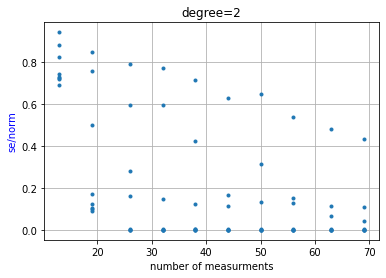

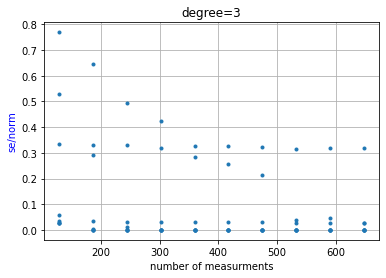

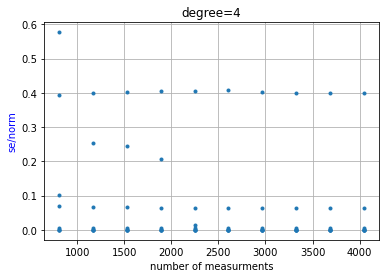

In [104]:
for depth in range(2,5):
    fig, ax = plt.subplots()
    ax.set_ylabel("se/norm", color="blue")
    ax.set_xlabel("number of measurments")
    ax.plot([a[0] for a in result_cs[depth]],[a[1] for a in result_cs[depth]],'.')
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()


In [134]:
# Reed-solomon method
result_reed_solomon = {}
for depth in range(2,7):
    result_reed_solomon[depth] = []
    for C in np.linspace(1,1.6,10):
        for ratio in np.linspace(1.1,2.1,10):
            try:
                f =open(f"../results/reed_solomon/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")
                data = json.loads(f.read())
                print(data["k"])
                result_reed_solomon[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared']))
            except:
                print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086
1086


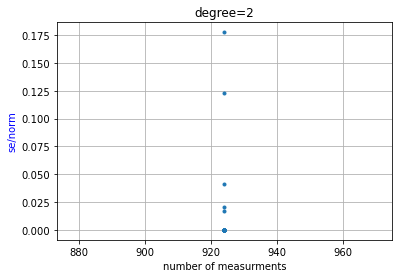

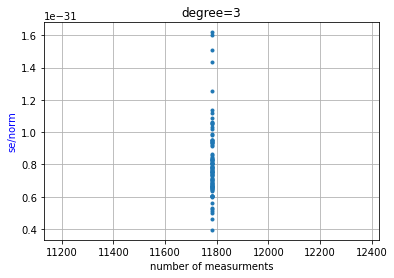

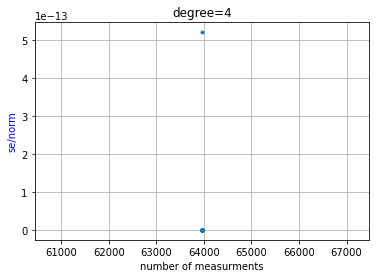

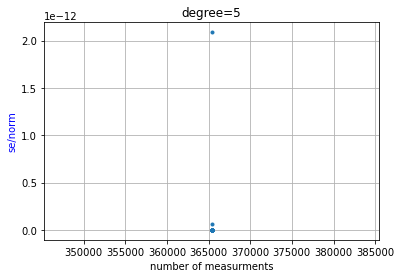

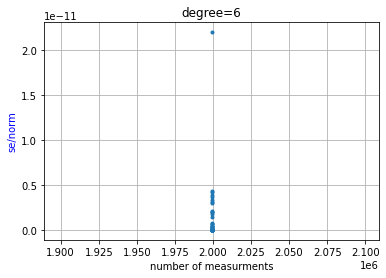

In [105]:
print
for depth in range(2,7):
    fig, ax = plt.subplots()
    ax.set_ylabel("se/norm", color="blue")
    ax.set_xlabel("number of measurments")
    ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'.')
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()


In [131]:
# Binning method
from math import ceil
result_binning = {}
for depth in range(2,5):
    result_binning[depth] = []
    for C in np.linspace(1,1.6,5):
        for ratio in np.linspace(1.1,2.1,5):
            # Iterations over the frequency recovery primitive
            cs_bins_range = np.linspace(0.1 * depth ** 2, depth ** 2, 10)
            cs_bins_range = [float(ceil(a)) for a in cs_bins_range]
            for cs_bins in cs_bins_range:
                for cs_iterations in [float(1), float(2), float(3), float(4)]:
                    for cs_ratio in [1.2, 1.3, 1.4, 1.5, 1.6]:
                        try:
                            f =open(f"../results/binning/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")
                            data = json.loads(f.read())
                            if (data["mse"]/data['true_fourier_norm_squared'])>1  or (data["measurements"])>10000:
                                continue
                            result_binning[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared']))
                        except:
                            print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")

In [132]:
print(result_binning)

{2: [(1688, 1.6165736927676472e-32), (1672, 1.6592132890160518e-32), (1672, 1.7786041585115854e-32), (1664, 1.411903630775304e-32), (1680, 6.443908983040175e-33), (2648, 1.0281472645396608e-32), (2648, 1.0963706185371085e-32), (2616, 1.6592132890160518e-32), (2624, 1.7103808045141377e-32), (2648, 1.0281472645396608e-32), (3624, 1.0963706185371085e-32), (3584, 4.6956855368555786e-33), (3616, 1.6592132890160518e-32), (3576, 1.5227665810211565e-32), (3616, 0.002244237810814757), (4584, 7.083502926766248e-33), (4536, 0.32304230116572286), (4592, 0.0006412108030899326), (4544, 1.7274366430134995e-32), (4576, 6.443908983040175e-33), (1688, 1.6165736927676472e-32), (1672, 1.6592132890160518e-32), (1672, 1.7786041585115854e-32), (1664, 1.411903630775304e-32), (1680, 6.443908983040175e-33), (2648, 1.0281472645396608e-32), (2648, 1.0963706185371085e-32), (2616, 1.6592132890160518e-32), (2624, 1.7103808045141377e-32), (2648, 1.0281472645396608e-32), (3624, 1.0963706185371085e-32), (3584, 4.695685

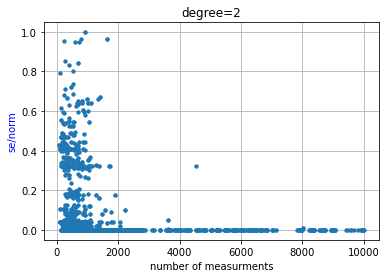

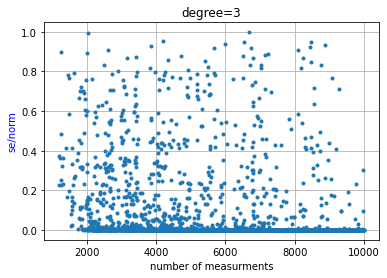

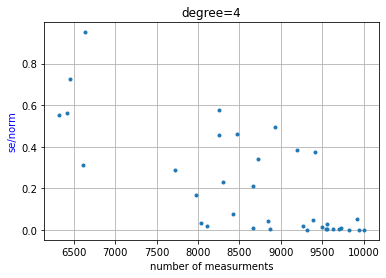

In [133]:
for depth in range(2,5):
    fig, ax = plt.subplots()
    ax.set_ylabel("se/norm", color="blue")
    ax.set_xlabel("number of measurments")
    ax.plot([a[0] for a in result_binning[depth]],[a[1] for a in result_binning[depth]],'.')
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()

In [ ]:
# Random measurement method
from math import ceil
result_binning = {}
for depth in range(2,5):
    result_binning[depth] = []
    for C in np.linspace(1,1.6,5):
        for ratio in np.linspace(1.1,2.1,5):
            # Iterations over the frequency recovery primitive
            cs_bins_range = np.linspace(0.1 * depth ** 2, depth ** 2, 10)
            cs_bins_range = [float(ceil(a)) for a in cs_bins_range]
            for cs_bins in cs_bins_range:
                for cs_iterations in [float(1), float(2), float(3), float(4)]:
                    for cs_ratio in [1.2, 1.3, 1.4, 1.5, 1.6]:
                        try:
                            f =open(f"../results/binning/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")
                            data = json.loads(f.read())
                            if (data["mse"]/data['true_fourier_norm_squared'])>1  or (data["measurements"])>10000:
                                continue
                            result_binning[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared']))
                        except:
                            print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")